# ATM Cash Demand Analysis

## Description
The goal of this project is to build a predictive model for ATM cash demand by leveraging statistical and machine learning models.
By accurately forecasting cash withdrawals, banks can optimize the distribution of cash across their ATM networks, reducing shortages and excess idle cash.

## Key Objectives 

- Improve cash flow management for banks.  
- Reduce operational costs associated with cash handling and transport.  
- Enhance customer satisfaction by ensuring ATMs are adequately funded.  

This page goes into the exploratory analysis of the raw data.

In [19]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("data") / "ATM_sample.csv"
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()


(22000, 7)


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [20]:
print(df.shape)
display(df.sample(5))
display(df.describe(include="all").T)
df.info()


(22000, 7)


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
2770,10.12,13,1,0,0,0,68.934921
17160,1.02,3,0,1,0,0,16.029004
10813,10.09,6,1,0,0,1,77.036974
19054,9.94,9,1,1,0,0,69.528612
12796,0.96,3,0,1,0,1,16.347959


,count,mean,std,min,25%,50%,75%,max
Shops,22000.0,7.316373,4.118692,0.800000,1.050000,9.890000,10.070000,10.830000
ATMs,22000.0,7.937455,3.673415,0.000000,4.000000,9.000000,11.000000,17.000000
Downtown,22000.0,0.702000,0.457390,0.000000,0.000000,1.000000,1.000000,1.000000
Weekday,22000.0,0.714091,0.451857,0.000000,0.000000,1.000000,1.000000,1.000000
Center,22000.0,0.102455,0.303252,0.000000,0.000000,0.000000,0.000000,1.000000
High,22000.0,0.301591,0.458959,0.000000,0.000000,0.000000,1.000000,1.000000
Withdraw,22000.0,54.652818,25.099767,11.668197,18.500386,68.240749,71.345778,103.964065


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


The data shows 22 000 observations with 7 variables.

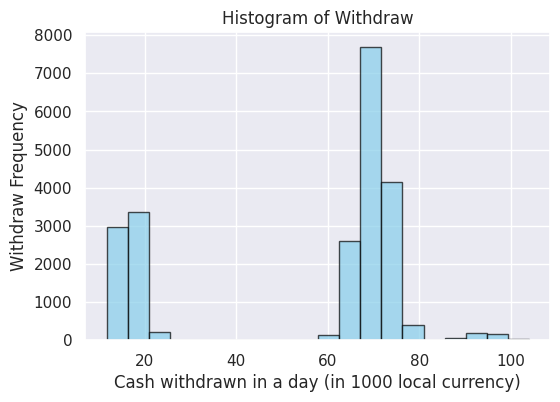

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df["Withdraw"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)

plt.title("Histogram of Withdraw")
plt.xlabel("Cash withdrawn in a day (in 1000 local currency)")
plt.ylabel("Withdraw Frequency")
plt.show()


Bimodal distribution with two distinct peaks at 20 and 70. Higher peak reprsent ATMs in busier commerical areas compared to lower.

/tmp/ipykernel_6980/3007253743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette="Blues")
/tmp/ipykernel_6980/3007253743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette="Blues")
/tmp/ipykernel_6980/3007253743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette="Blues")
/tmp/ipykernel_6980/3007253743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

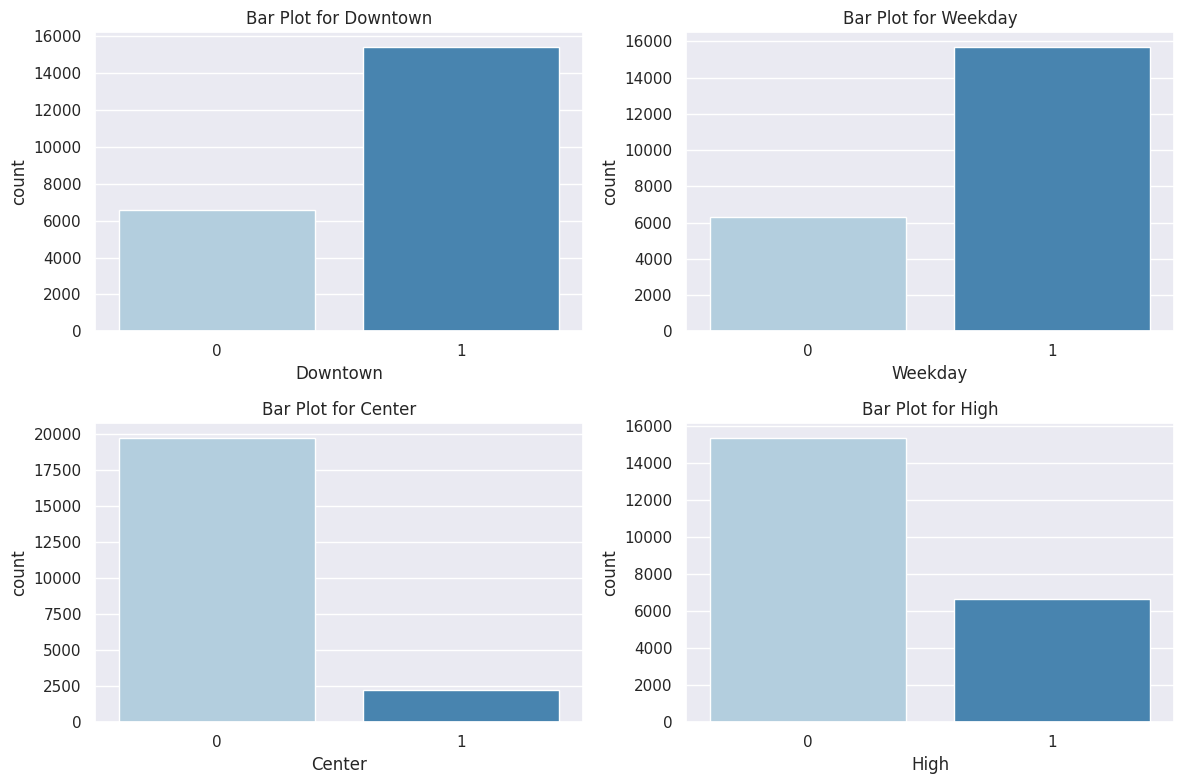

In [ ]:
# Column list
cols = ["Downtown", "Weekday", "Center", "High"]

# Set up grid 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes 
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Blues")
    axes[i].set_title(f"Bar Plot for {col}")
    axes[i].set_ylabel("count")

plt.tight_layout()
plt.show()

Most ATMs located downtown with greater frequency of withdrawals on weekdays.

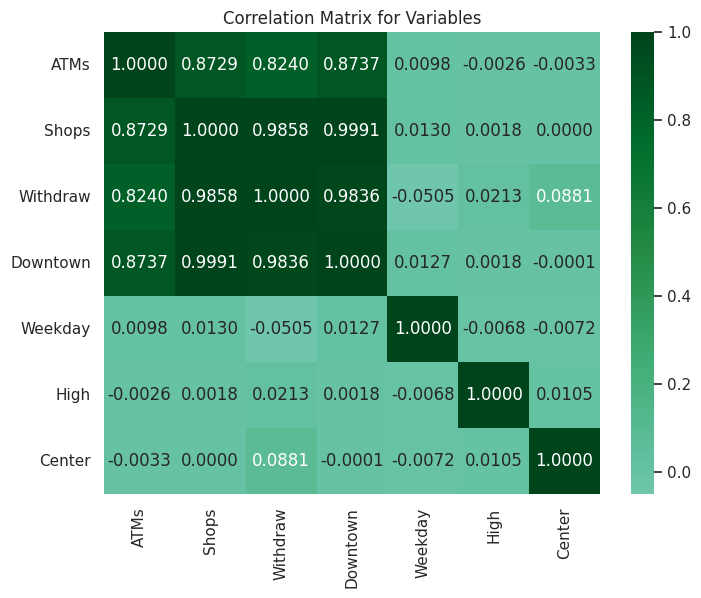

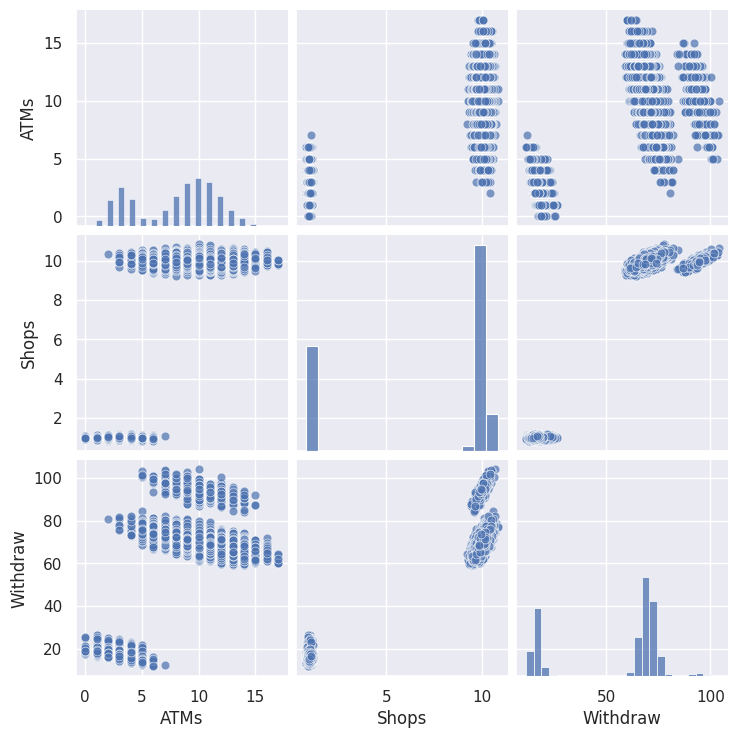

In [25]:
# Select columns
num_cols = ["ATMs", "Shops", "Withdraw", "Downtown", "Weekday", "High", "Center"]

# Crrelation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="BuGn", center=0, fmt=".4f")
plt.title("Correlation Matrix for Variables")
plt.show()

pair_cols = ["ATMs", "Shops", "Withdraw"]

#Plot pairplot
sns.pairplot(df[pair_cols], diag_kind="hist", plot_kws={"alpha":0.7, "s":40})
plt.show()


High correlation between ATMs, shops and withdrawls. 